In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


 

In [14]:
#Load datasets
#training_df = pd.read_csv("Filtered_Training.csv")
training_df = pd.read_csv("Filtered_Training.csv")
description_df = pd.read_csv("description.csv")
precautions_df = pd.read_csv("precautions_df.csv")
diets_df = pd.read_csv("diets.csv")
medications_df = pd.read_csv("medications.csv")
 
 

In [15]:
# Step 1: Prepare features and target
X = training_df.drop(columns=['prognosis'])
y = training_df['prognosis']


In [16]:
# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())


Accuracy: 1.0
Classification Report:
                          precision    recall  f1-score   support

                   AIDS       1.00      1.00      1.00        27
                   Acne       1.00      1.00      1.00        28
                Allergy       1.00      1.00      1.00        16
       Bronchial Asthma       1.00      1.00      1.00        20
            Chicken pox       1.00      1.00      1.00        22
                 Dengue       1.00      1.00      1.00        25
          Drug Reaction       1.00      1.00      1.00        23
       Fungal infection       1.00      1.00      1.00        24
           Heart attack       1.00      1.00      1.00        25
               Jaundice       1.00      1.00      1.00        28
                Malaria       1.00      1.00      1.00        25
               Migraine       1.00      1.00      1.00        22
              Pneumonia       1.00      1.00      1.00        19
           Tuberculosis       1.00      1.00      1

In [19]:
# Step 5: Predict from user symptoms
def predict_disease(symptoms):
    input_data=[0] * len(X.columns)
    for i, col in enumerate(X.columns):
        if col in symptoms:
            input_data[i] = 1
    prediction = model.predict([input_data])[0]
    return prediction

In [20]:
# Step 6: Get additional info based on disease
def get_info(disease):
    desc = description_df[description_df['Disease'] == disease]['Description'].values
    precaution = precautions_df[precautions_df['Disease'] == disease].iloc[:, 1:].values.flatten()
    diet = diets_df[diets_df['Disease'] == disease].iloc[:, 1:].values.flatten()
    meds = medications_df[diets_df['Disease'] == disease].iloc[:, 1:].values.flatten()
     
    return {
        'Description': desc[0] if len(desc) > 0 else "No description available.",
        'Precautions': [str(item) for item in precaution] if len(precaution) > 0 else [],
        'Diet': [str(item) for item in diet] if len(diet) > 0 else [],
        'Medications': [str(item) for item in meds] if len(meds) > 0 else []

    }


In [21]:
# Step 7: Input validation and user interaction
def validate_input(symptoms):
    valid_symptoms = set(X.columns)
    invalid = [symptom for symptom in symptoms if symptom not in valid_symptoms]
    if invalid:
        print(f"Invalid symptoms: {', '.join(invalid)}")
        return False
    return True

In [22]:
# Example usage with validated input
user_symptoms = input("Enter symptoms (comma-separated): ").split(',')
if validate_input(user_symptoms):
    predicted_disease = predict_disease(user_symptoms)
    print(f"\nPredicted Disease: {predicted_disease}")

    info = get_info(predicted_disease)
    print("\nDescription:", info['Description'])
    print("Precautions:", ', '.join(info['Precautions']))
    print("Diet:", ', '.join(info['Diet']))
    print("Medications:", ', '.join(info['Medications']))
     
else:
    print("Please provide valid symptoms from the dataset.")


Predicted Disease: Drug Reaction

Description: Drug Reaction occurs when the body reacts adversely to a medication.
Precautions: Drug Reaction, stop irritation, consult nearest hospital, stop taking drug, follow up
Diet: ['Antihistamine Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']
Medications: ['Antihistamines', 'Epinephrine', 'Corticosteroids', 'Antibiotics', 'Antifungal Cream']


c:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


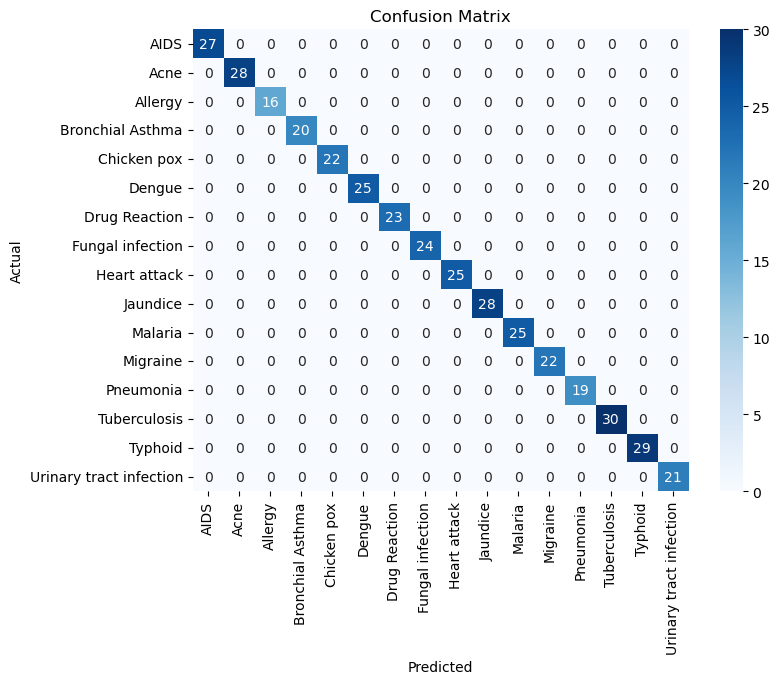

In [23]:
# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
import joblib
model_filename = "medicine.pkl"

# Ensure the model file is saved in the correct location
try:
    joblib.dump(model, model_filename)
    print(f"Model saved successfully as {model_filename}")
except Exception as e:
    print(f"Error saving model: {e}")


Model saved successfully as medicine.pkl
